Notebook um eine Vorhersage zum Umsatz der Konditorei (Warengruppe_4) zu treffen. 
Dazu gibt es den:
- Trainingsdatensatz: 05.10.2013 - 31.07.2017
- Validierungsdatensatz : 01.08.2017 - 31.07.2018
- Testdatensatz: 01.08.2018 - 30.07.2019


In [20]:
#import packages for data handling and sdg regression
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor  # Stochastic Gradient Descent Regressor
from sklearn.metrics import mean_absolute_error, mean_squared_error  # Evaluation metrics

In [21]:
#load data
#trainigsamples
data_train = pd.read_csv('../../0_DataPreparation/00_data/Trainingsdaten_long.csv')
print(data_train.head())
print(data_train.shape)

#validation samples
data_val = pd.read_csv('../../0_DataPreparation/00_data/Validierungsdaten_long.csv')
print(data_val.head())
print(data_val.shape)

        Datum      Umsatz  Warengruppe_1  Warengruppe_2  Warengruppe_3  \
0  2013-07-01  148.828353              1              0              0   
1  2013-07-02  159.793757              1              0              0   
2  2013-07-03  111.885594              1              0              0   
3  2013-07-04  168.864941              1              0              0   
4  2013-07-05  171.280754              1              0              0   

   Warengruppe_4  Warengruppe_5  Warengruppe_6  Temp_Very_Cold  Temp_Cold  \
0              0              0              0               0          0   
1              0              0              0               0          0   
2              0              0              0               0          0   
3              0              0              0               0          0   
4              0              0              0               0          0   

   ...  Samstag  Sonntag   VPI  Number_of_ships  Ship  Heimspiel  Feiertag  \
0  ...        

In [22]:
#extract the konditorei data (warengruppe = 4)
training_data = data_train[data_train['Warengruppe_4']==1]
print(training_data.shape)

validation_data = data_val[data_val['Warengruppe_4']==1]
print(validation_data.shape)

(1409, 39)
(357, 39)


In [23]:
#extract the target variable
y_train = training_data['Umsatz']
print(y_train.head())
print(y_train.shape)
y_val = validation_data['Umsatz']

#extract the features (nur die wenigen die 'meine' waren)
features = ['Warengruppe_1', 'Warengruppe_2', 'Warengruppe_3','Warengruppe_4', 'Warengruppe_5', 'Warengruppe_6','Ship', 'is_holiday']
x_train = training_data[features]
x_val = validation_data[features]
print(x_train.head())
print(x_train.shape)

4386    65.890169
4387    74.543917
4388    69.262728
4389    61.490175
4390    86.759861
Name: Umsatz, dtype: float64
(1409,)
      Warengruppe_1  Warengruppe_2  Warengruppe_3  Warengruppe_4  \
4386              0              0              0              1   
4387              0              0              0              1   
4388              0              0              0              1   
4389              0              0              0              1   
4390              0              0              0              1   

      Warengruppe_5  Warengruppe_6  Ship  is_holiday  
4386              0              0     0           1  
4387              0              0     0           1  
4388              0              0     0           1  
4389              0              0     0           1  
4390              0              0     1           1  
(1409, 8)


In [24]:
#train the sgd regression model
# Train a Stochastic Gradient Descent (SGD) Regressor
# Parameters:
# - max_iter: Maximum number of iterations for training.
# - learning_rate: Type of learning rate schedule ('invscaling' decreases learning rate over time).
# - eta0: Initial learning rate.
sgd_model = SGDRegressor(max_iter=1000, learning_rate='invscaling', eta0=0.01, random_state=42)
sgd_model.fit(x_train, y_train)

SGDRegressor(random_state=42)

In [25]:
# Make predictions on the test set
sgd_predictions = sgd_model.predict(x_val)
print("Predictions for test data:", sgd_predictions[:5])  # Display first 5 predictions

Predictions for test data: [86.65206389 86.65206389 86.65206389 86.65206389 86.65206389]


In [26]:
# Calculate error metrics
mae = mean_absolute_error(y_val, sgd_predictions)  # Mean Absolute Error
mse = mean_squared_error(y_val, sgd_predictions)  # Mean Squared Error
mape = (abs((y_val - sgd_predictions) / y_val).mean()) * 100  # Mean Absolute Percentage Error

# Print error metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Error (MAE): 20.02
Mean Squared Error (MSE): 712.79
Mean Absolute Percentage Error (MAPE): 25.90%


/tmp/ipykernel_65078/4123917379.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', color="red")


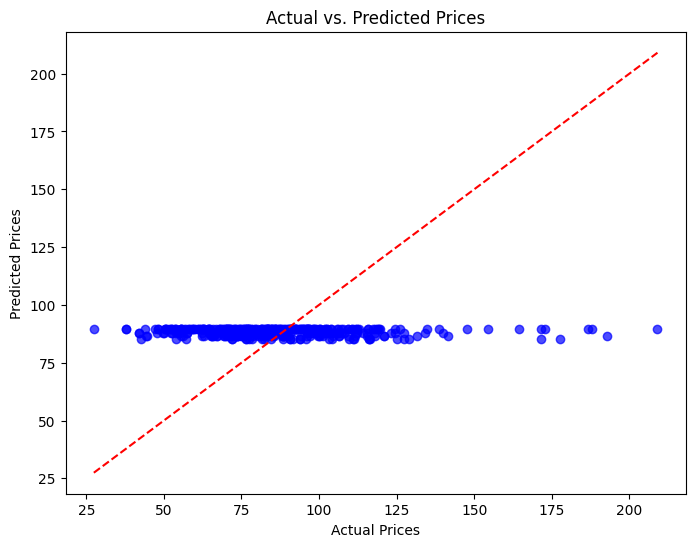

In [27]:
# Plot: Actual vs. Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_val, sgd_predictions, alpha=0.7, color="blue")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', color="red")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.show()


Nun nochmal alle features hinzu nehmen und schauen wie die der fehler verhält

In [28]:
#get the column name of the features
print(data_train.columns)
features_all = ['Warengruppe_1', 'Warengruppe_2', 'Warengruppe_3',
       'Warengruppe_4', 'Warengruppe_5', 'Warengruppe_6', 'Temp_Very_Cold',
       'Temp_Cold', 'Temp_Mild', 'Temp_Warm', 'Temp_Hot', 'Cloud_Clear',
       'Cloud_Partly_Cloudy', 'Cloud_Cloudy', 'Wind_Light', 'Wind_Moderate',
       'Wind_Strong', 'Weather_Good', 'Weather_Light_Issues',
       'Weather_Moderate', 'Weather_Severe', 'KielerWoche', 'Montag',
       'Dienstag', 'Mittwoch', 'Donnerstag', 'Freitag', 'Samstag', 'Sonntag',
        'Number_of_ships', 'Ship', 'Heimspiel', 'Feiertag', 'is_holiday',
       'Weihnachtsmarkt', 'Markt']
x_train2 = training_data[features_all]
x_val2 = validation_data[features_all]
print(x_train2.head())
print(x_train2.shape)

y_train2 = training_data['Umsatz']
y_val2 = validation_data['Umsatz']

Index(['Datum', 'Umsatz', 'Warengruppe_1', 'Warengruppe_2', 'Warengruppe_3',
       'Warengruppe_4', 'Warengruppe_5', 'Warengruppe_6', 'Temp_Very_Cold',
       'Temp_Cold', 'Temp_Mild', 'Temp_Warm', 'Temp_Hot', 'Cloud_Clear',
       'Cloud_Partly_Cloudy', 'Cloud_Cloudy', 'Wind_Light', 'Wind_Moderate',
       'Wind_Strong', 'Weather_Good', 'Weather_Light_Issues',
       'Weather_Moderate', 'Weather_Severe', 'KielerWoche', 'Montag',
       'Dienstag', 'Mittwoch', 'Donnerstag', 'Freitag', 'Samstag', 'Sonntag',
       'VPI', 'Number_of_ships', 'Ship', 'Heimspiel', 'Feiertag', 'is_holiday',
       'Weihnachtsmarkt', 'Markt'],
      dtype='object')
      Warengruppe_1  Warengruppe_2  Warengruppe_3  Warengruppe_4  \
4386              0              0              0              1   
4387              0              0              0              1   
4388              0              0              0              1   
4389              0              0              0              1   
4390     

In [29]:
#train the model with all features
sgd_model2 = SGDRegressor(max_iter=1000, learning_rate='invscaling', eta0=0.01, random_state=42)
sgd_model2.fit(x_train2, y_train2)

SGDRegressor(random_state=42)

In [30]:
#get the predictions
sgd_predictions2 = sgd_model2.predict(x_val2)
print("Predictions for test data:", sgd_predictions2[:5])  # Display first 5 predictions

Predictions for test data: [67.51481619 69.0798159  70.22435437 74.85963537 78.02762558]


In [31]:
# Calculate error metrics
mae = mean_absolute_error(y_val2, sgd_predictions2)  # Mean Absolute Error
mse = mean_squared_error(y_val2, sgd_predictions2)  # Mean Squared Error
mape = (abs((y_val2 - sgd_predictions2) / y_val2).mean()) * 100  # Mean Absolute Percentage Error

# Print error metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Error (MAE): 18.97
Mean Squared Error (MSE): 650.34
Mean Absolute Percentage Error (MAPE): 23.69%


/tmp/ipykernel_65078/2426045811.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_val2.min(), y_val2.max()], [y_val2.min(), y_val2.max()], 'k--', color="red")


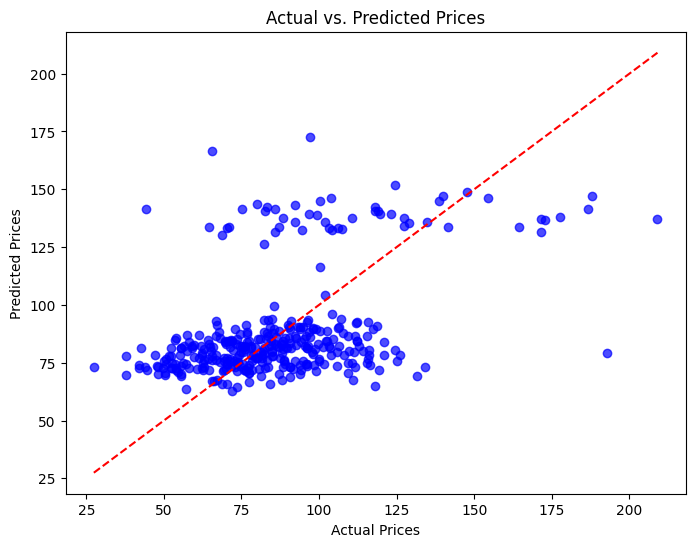

In [32]:
# Plot: Actual vs. Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_val2, sgd_predictions2, alpha=0.7, color="blue")
plt.plot([y_val2.min(), y_val2.max()], [y_val2.min(), y_val2.max()], 'k--', color="red")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.show()

Das Model mit allen features verwende ich nun, um eine Vorhersage für meine Testdaten zu machen.

In [33]:
#load the test data
data_test = pd.read_csv('../../0_DataPreparation/00_data/Testdaten.csv')
print(data_test.head())
print(data_test.tail())

        id       Datum  Warengruppe_1  Warengruppe_2  Warengruppe_3  \
0  1808011  2018-08-01              1              0              0   
1  1808021  2018-08-02              1              0              0   
2  1808031  2018-08-03              1              0              0   
3  1808041  2018-08-04              1              0              0   
4  1808051  2018-08-05              1              0              0   

   Warengruppe_4  Warengruppe_5  Warengruppe_6  Temp_Very_Cold  Temp_Cold  \
0              0              0              0               0          0   
1              0              0              0               0          0   
2              0              0              0               0          0   
3              0              0              0               0          0   
4              0              0              0               0          0   

   ...  Samstag  Sonntag    VPI  Number_of_ships  Ship  Heimspiel  Feiertag  \
0  ...        0        0  104.5

In [34]:
#test daten vorbereiten
#nach croissants filtern
test_data = data_test[data_test['Warengruppe_4']==1]
print(test_data.shape)
print(test_data.head())
print(test_data.tail())

#nur die features nehmen, die auch im training vorhanden sind
x_test = test_data[features_all]
print(x_test.head())

(354, 39)
           id       Datum  Warengruppe_1  Warengruppe_2  Warengruppe_3  \
1065  1808014  2018-08-01              0              0              0   
1066  1808024  2018-08-02              0              0              0   
1067  1808034  2018-08-03              0              0              0   
1068  1808044  2018-08-04              0              0              0   
1069  1808054  2018-08-05              0              0              0   

      Warengruppe_4  Warengruppe_5  Warengruppe_6  Temp_Very_Cold  Temp_Cold  \
1065              1              0              0               0          0   
1066              1              0              0               0          0   
1067              1              0              0               0          0   
1068              1              0              0               0          0   
1069              1              0              0               0          0   

      ...  Samstag  Sonntag    VPI  Number_of_ships  Ship  Heims

In [35]:
#vorhersagen für testadaten 
sgd_predictions_test = sgd_model2.predict(x_test)
print("Predictions for test data:", sgd_predictions_test[:5])  # Display first 5 predictions

Predictions for test data: [ 71.29550258  64.2130639   66.85988099  69.77278547 127.42744334]


In [36]:
#predictions in testdaten einfügen
test_data['Umsatz_pred'] = sgd_predictions_test
print(test_data.head())
print(test_data.tail())

           id       Datum  Warengruppe_1  Warengruppe_2  Warengruppe_3  \
1065  1808014  2018-08-01              0              0              0   
1066  1808024  2018-08-02              0              0              0   
1067  1808034  2018-08-03              0              0              0   
1068  1808044  2018-08-04              0              0              0   
1069  1808054  2018-08-05              0              0              0   

      Warengruppe_4  Warengruppe_5  Warengruppe_6  Temp_Very_Cold  Temp_Cold  \
1065              1              0              0               0          0   
1066              1              0              0               0          0   
1067              1              0              0               0          0   
1068              1              0              0               0          0   
1069              1              0              0               0          0   

      ...  Sonntag    VPI  Number_of_ships  Ship  Heimspiel  Feiertag  \
1

/tmp/ipykernel_65078/2858737107.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Umsatz_pred'] = sgd_predictions_test


In [39]:
#nur die relevanten spalten behalten
test_data = test_data[['id','Umsatz_pred']]
#rename columns
test_data.rename(columns={'Umsatz_pred':'Umsatz'}, inplace=True)
print(test_data.head())
print(test_data.tail())

           id      Umsatz
1065  1808014   71.295503
1066  1808024   64.213064
1067  1808034   66.859881
1068  1808044   69.772785
1069  1808054  127.427443
           id      Umsatz
1414  1907264   68.350586
1415  1907274   79.805858
1416  1907284  130.933157
1417  1907294   63.324539
1418  1907304   67.547186


In [40]:
#export the data as csv
test_data.to_csv('../Konditorei_sample_submission.csv', index=False)